# Agrupamiento aglomerativo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://bit.ly/2COHM14'
data=pd.read_csv(url)
data.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


In [ ]:
#Preprocesamiento: normalización
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled =pd.DataFrame(data_scaled,columns=data.columns)
data_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...,...,...
435,0.000026,0.000078,0.776890,0.315197,0.419191,0.343549,0.004760,0.057646
436,0.000025,0.000076,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
437,0.000050,0.000075,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
438,0.000091,0.000273,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


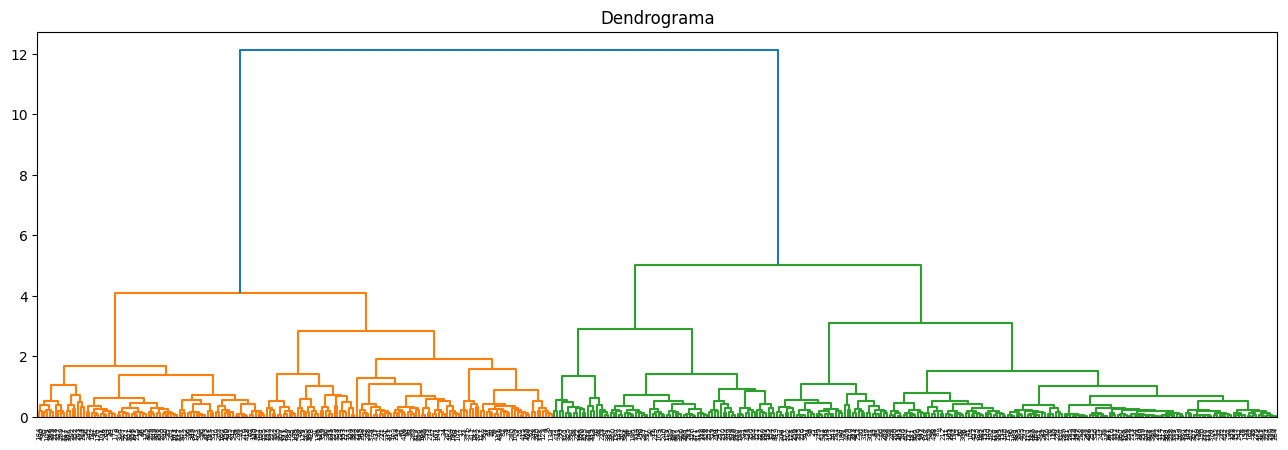

In [ ]:
# Dendrograma
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16,5))
plt.title('Dendrograma')
dend=sch.dendrogram(sch.linkage(data_scaled,method='ward'))

In [ ]:
# 2 grupos
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_hat=ac.fit_predict(data_scaled)

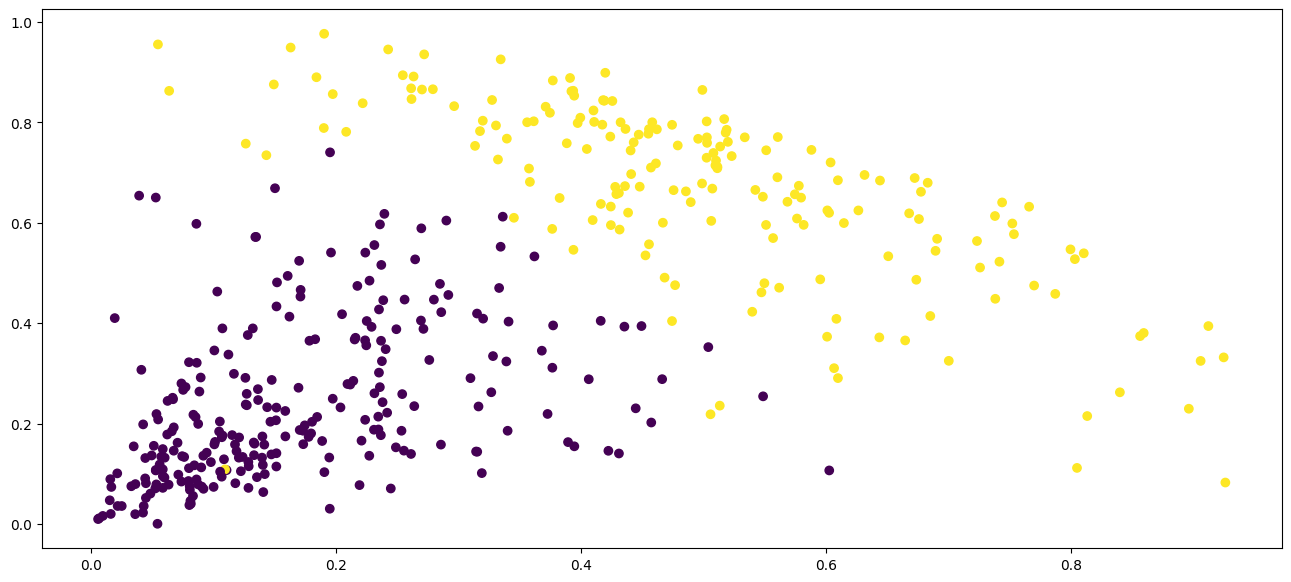

In [ ]:
plt.figure(figsize=(16,7))
plt.scatter(data_scaled.Milk, data_scaled.Grocery,c=y_hat)

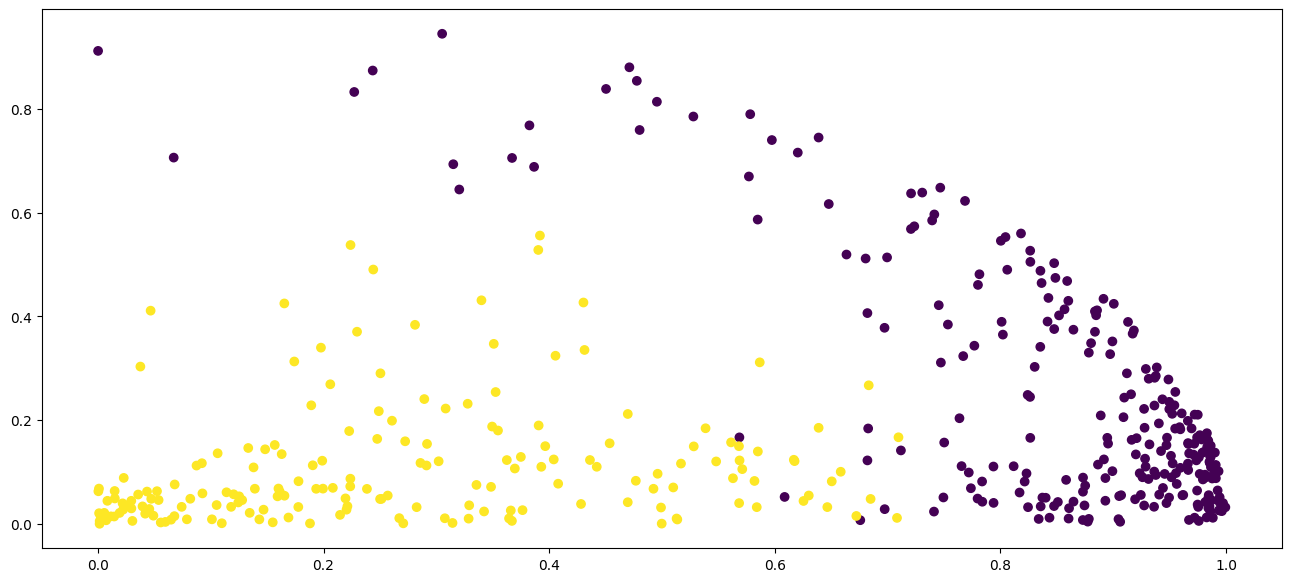

In [ ]:
plt.figure(figsize=(16,7))
plt.scatter(data_scaled.Fresh, data_scaled.Frozen,c=y_hat)

In [1]:
#Ejemplo 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data=pd.read_csv('https://bit.ly/3TUeh37')
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
#Sera que separar por mujeres y hombres nos da un mejor modelo
X=data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

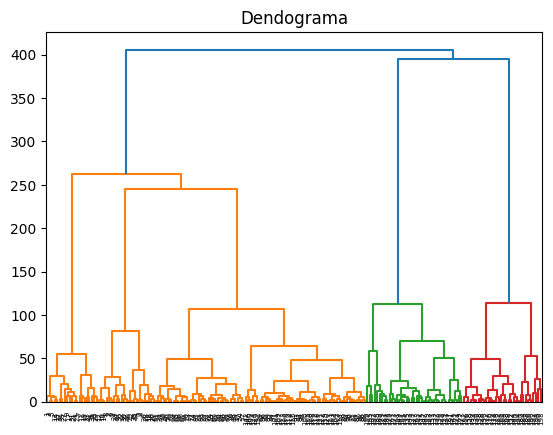

In [ ]:
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendograma')
plt.show()
#Reomienda 3 grupos

In [ ]:
# 3 grupos
from sklearn.cluster import AgglomerativeClustering
ac= AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
y_hat=ac.fit_predict(X)

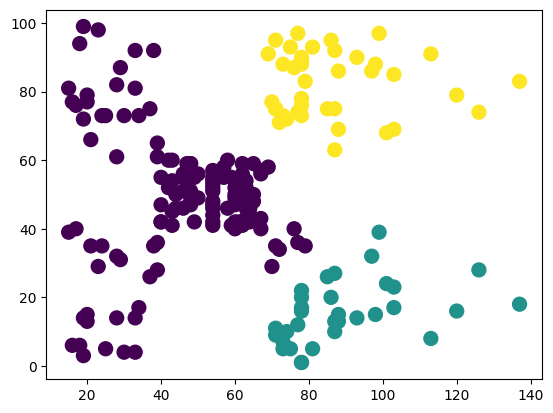

In [ ]:
plt.scatter(X[:,0],X[:,1],s=100,c=y_hat)

In [ ]:
# 5 grupos
from sklearn.cluster import AgglomerativeClustering
ac= AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hc=ac.fit_predict(X)

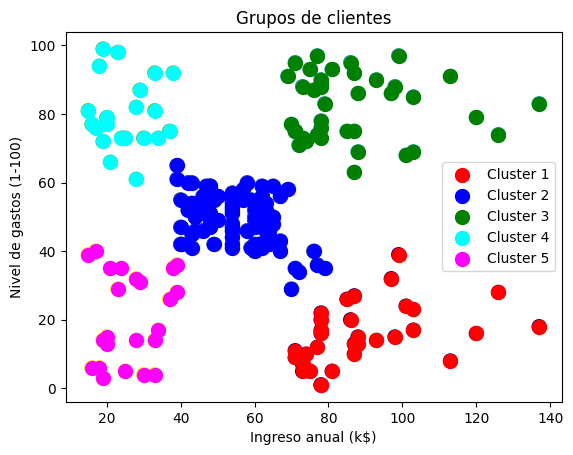

In [ ]:
plt.scatter(X[:,0],X[:,1],s=100,c=y_hat)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Grupos de clientes')
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Nivel de gastos (1-100)')
plt.legend()
plt.show()

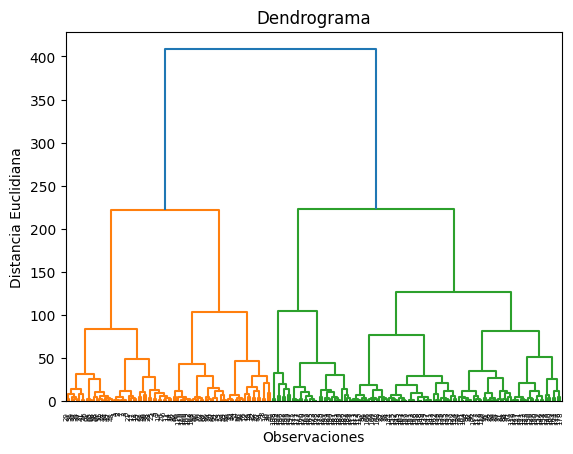

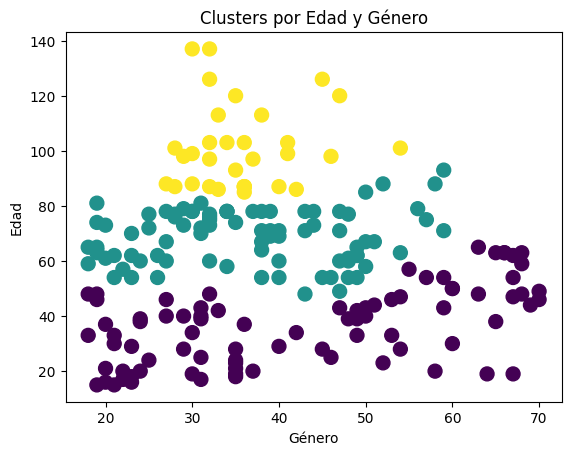

In [4]:
#Edad y genero, ver que resultados se obtienes


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Cargar el conjunto de datos desde un archivo local
data=pd.read_csv('https://bit.ly/3TUeh37')

# Ajusta los índices de las columnas según la estructura de tus datos
# Por ejemplo, si "Género" está en la columna 2 y "Edad" en la columna 3:
X = data.iloc[:, [2, 3]].values

# Crear el dendograma
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Realizar el clustering aglomerativo
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hat = ac.fit_predict(X)

# Visualizar los clusters con un scatter plot
plt.scatter(X[:, 0], X[:, 1], s=100, c=y_hat)
plt.title('Clusters por Edad y Género')
plt.xlabel('Género')  # Cambia esta etiqueta si es necesario
plt.ylabel('Edad')  # Cambia esta etiqueta si es necesario
plt.show()


# Modelos de mezclas gausianas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

The hitchhikers guide to the galaxy

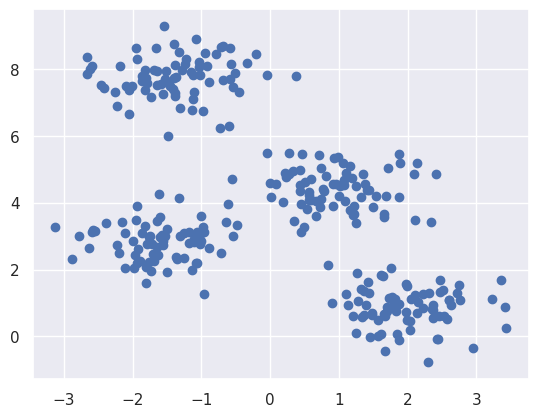

In [ ]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)
plt.scatter(X[:,0],X[:,1])

Text(0.5, 0, 'Numero de grupos')

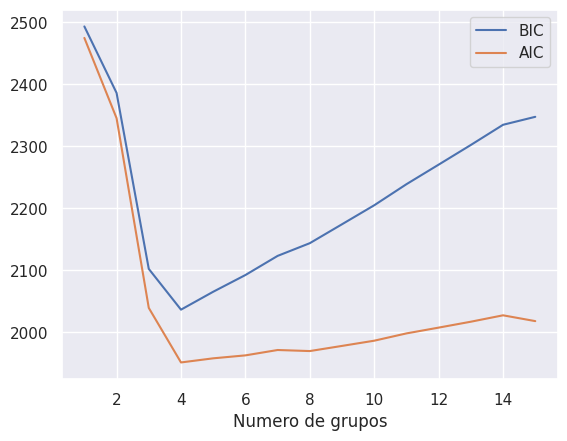

In [ ]:
#Determinar el numero de grupos
from sklearn.mixture import GaussianMixture
n_clusters = range(1,16)
models=[GaussianMixture(n,covariance_type='full',random_state=0).fit(X) for n in n_clusters]
plt.plot(n_clusters,[m.bic(X) for m in models],label='BIC') #Bayesiano
plt.plot(n_clusters,[m.aic(X) for m in models],label='AIC') #Akaike
plt.legend(loc='best')
plt.xlabel('Numero de grupos')

Metodo del codo, dendrograma, y mezclas gausianas no son excluyentes

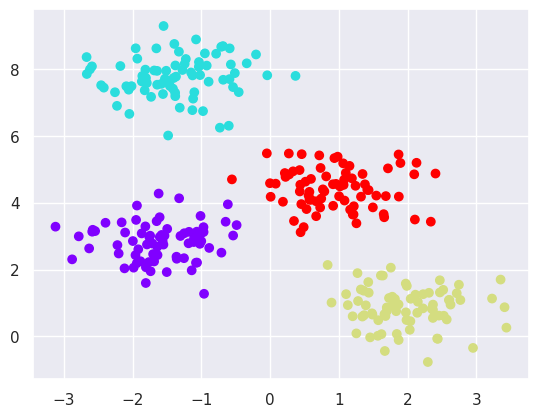

In [ ]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
y_hat=gmm.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_hat,cmap='rainbow')

In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:

X_train = np.load('data.npy')
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()

HTTPError: HTTP Error 404: Not Found

In [ ]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)
print('Medias:\n', gmm.means_)
print('Covarianzas:\n', gmm.covariances_)

In [ ]:
X, Y = np.meshgrid(np.linspace(-1,6,500), np.linspace(-1,6,500))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contourf(X, Y, Z, cmap='rainbow')
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()